# Part II: Model Development

In this part, we develop three unique pipelines for predicting backorder. We use the smart sample from Part I to fit and evaluate these pipelines. 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import os, sys
import itertools
import numpy as np
import pandas as pd

## Reload the smart sample here

In [2]:

# Reload your smart sampling from local file 
# ----------------------------------

import joblib

# Load the sampled data from the file
hitesh_df = joblib.load('undersample_df.pkl')



In [3]:
hitesh_df.isna().sum()

national_inv         0
lead_time            0
in_transit_qty       0
forecast_3_month     0
forecast_6_month     0
forecast_9_month     0
sales_1_month        0
sales_3_month        0
sales_6_month        0
sales_9_month        0
min_bank             0
potential_issue      0
pieces_past_due      0
perf_6_month_avg     0
perf_12_month_avg    0
local_bo_qty         0
deck_risk            0
oe_constraint        0
ppap_risk            0
stop_auto_buy        0
rev_stop             0
went_on_backorder    0
dtype: int64

## Normalize/standardize the data.

In [4]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()

# #Normalizse the dat 

# normalized_data = scaler.fit_transform(hitesh_df)
# normalized_data


In [5]:
# #Checking if the data is normalised 

# import numpy as np

# normalized_data = scaler.fit_transform(hitesh_df)

# print("Mean:", np.mean(normalized_data, axis=0))
# print("Standard deviation:", np.std(normalized_data, axis=0)) #As mean is close to 0 and SD is close to 1 we can say that the data is normalized 



In [6]:
# import pandas as pd

# normalized_df = pd.DataFrame(normalized_data, columns=hitesh_df.columns)

# normalized_df.describe()

## Split the data into Train/Test

In [7]:
X = hitesh_df.iloc [:, :-1]
y = hitesh_df.went_on_backorder

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42, stratify=y)



## Developing Pipeline

In this section, we design an operationalized machine learning pipeline, which includes:

* Anomaly detection
* Dimensionality Reduction
* Train a classification model


In [9]:
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator



### Your 1st pipeline 
  * Anomaly detection
  * Dimensionality reduction
  * Model training/validation

In [10]:
X_train1 = X_train
y_train1 = y_train

In [11]:
# Add anomaly detection code  (Question #E201)
# ----------------------------------

from sklearn.ensemble import IsolationForest

# Construct IsolationForest 
iso_forest = IsolationForest(contamination=0.05).fit(X_train1, y_train1)

iso_outliers = iso_forest.predict(X_train1) == -1
print(f"Num of outliers = {np.sum(iso_outliers)}")
X_iso = X_train1[~iso_outliers]
y_iso = y_train1[~iso_outliers]





Num of outliers = 823


In [12]:
# Add codes for feature selection and classification pipeline with grid search  (Question #E202)
# ----------------------------------


pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('logreg', LogisticRegression(max_iter = 1000))                 
])

In [13]:
# Configuring the parameters for grid search 

param_grid = {'pca__n_components': [2, 5, 10, 20],
        'logreg__C': [0.1, 1, 10, 100, 1000]}

In [14]:
#Grid Search 

from sklearn.model_selection import GridSearchCV

model_grid1 = GridSearchCV(pipe, param_grid, cv = 5, n_jobs = 5)
model_grid1.fit(X_iso, y_iso)




GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('logreg',
                                        LogisticRegression(max_iter=1000))]),
             n_jobs=5,
             param_grid={'logreg__C': [0.1, 1, 10, 100, 1000],
                         'pca__n_components': [2, 5, 10, 20]})

In [15]:
# Given an unbiased evaluation  (Question #E203)
# ----------------------------------

y_pred = model_grid1.predict(X_test)
print(classification_report (y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.73      0.80      2743
           1       0.77      0.90      0.83      2742

    accuracy                           0.82      5485
   macro avg       0.83      0.82      0.81      5485
weighted avg       0.83      0.82      0.81      5485



In [16]:
print('Best Parameter: ', model_grid1.best_params_)
model_1 = model_grid1.best_estimator_
model_1

Best Parameter:  {'logreg__C': 1000, 'pca__n_components': 20}


Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=20)),
                ('logreg', LogisticRegression(C=1000, max_iter=1000))])

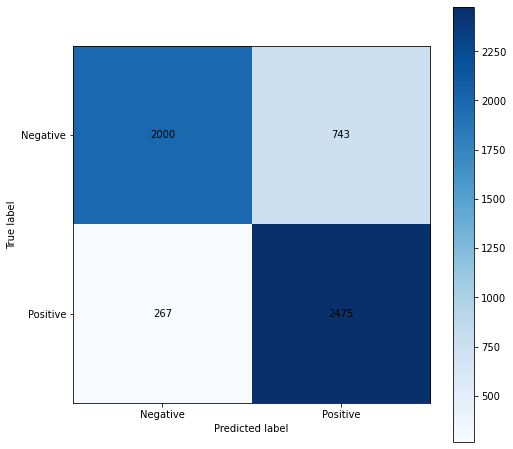

In [17]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)

# Create figure and axis objects
fig, ax = plt.subplots(figsize=(8, 8))

# Plot confusion matrix as heatmap with labels
im = ax.imshow(conf_mat, cmap='Blues')

# Add colorbar and labels
cbar = ax.figure.colorbar(im, ax=ax)
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(['Negative', 'Positive'])
ax.set_yticklabels(['Negative', 'Positive'])
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')

# Add values to heatmap
for i in range(len(conf_mat)):
    for j in range(len(conf_mat[0])):
        ax.text(j, i, conf_mat[i][j], ha='center', va='center', color='black')

plt.show()

#### <center>Recording the optimal hyperparameters and performance resulting from this pipeline.</center>

### Your 2nd pipeline
  * Anomaly detection
  * Dimensionality reduction
  * Model training/validation

In [27]:
X_train2 = X_train 
y_train2 = y_train

In [28]:
# Add anomaly detection code  (Question #E205)
# ----------------------------------

#Elliptic Envelope 

envelope = EllipticEnvelope(support_fraction=1, contamination=0.08)  
envelope.fit(X_train2)

# Predict outliers
outliers2 = envelope.predict(X_train2) == -1  

print(f"Number of outliers: {sum(outliers2)}")

X_env = X_train2[~outliers2]
y_env = y_train2[~outliers2]


Number of outliers: 1317


In [29]:
# Add codes for feature selection and classification pipeline with grid search  (Question #E206)
# ----------------------------------

pipe2 = Pipeline([
    ('scaler', MinMaxScaler()),
    ('fa', FactorAnalysis()),
    ('rf', RandomForestClassifier())                 
])

In [30]:
# Configuring the parameters for grid search 

param_grid2 = {
    'fa__n_components': [10, 20, 30, 40],
    'rf__n_estimators': [200, 400, 600, 800],
    'rf__max_depth': [None, 5, 10],
    'rf__min_samples_split': [2, 5, 10]
}

In [31]:
# Given an unbiased evaluation  (Question #E207)
# ----------------------------------

from sklearn.model_selection import GridSearchCV

model_grid2 = GridSearchCV(pipe2, param_grid2, cv = 5 , n_jobs = 5)
model_grid2.fit(X_env, y_env)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('fa', FactorAnalysis()),
                                       ('rf', RandomForestClassifier())]),
             n_jobs=5,
             param_grid={'fa__n_components': [10, 20, 30, 40],
                         'rf__max_depth': [None, 5, 10],
                         'rf__min_samples_split': [2, 5, 10],
                         'rf__n_estimators': [200, 400, 600, 800]})

In [32]:
y_pred2 = model_grid2.predict(X_test)
print(classification_report (y_test, y_pred2))



              precision    recall  f1-score   support

           0       0.90      0.86      0.88      2743
           1       0.87      0.90      0.89      2742

    accuracy                           0.88      5485
   macro avg       0.88      0.88      0.88      5485
weighted avg       0.88      0.88      0.88      5485



In [33]:
model_2 = model_grid2.best_estimator_

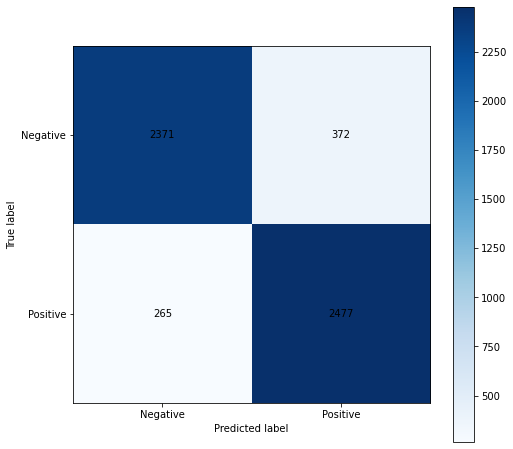

In [34]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred2)

# Create figure and axis objects
fig, ax = plt.subplots(figsize=(8, 8))

# Plot confusion matrix as heatmap with labels
im = ax.imshow(conf_mat, cmap='Blues')

# Add colorbar and labels
cbar = ax.figure.colorbar(im, ax=ax)
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(['Negative', 'Positive'])
ax.set_yticklabels(['Negative', 'Positive'])
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')

# Add values to heatmap
for i in range(len(conf_mat)):
    for j in range(len(conf_mat[0])):
        ax.text(j, i, conf_mat[i][j], ha='center', va='center', color='black')

plt.show()

#### <center>Recording the optimal hyperparameters and performance resulting from this pipeline.</center>

### Your 3rd pipeline
  * Anomaly detection
  * Dimensionality reduction
  * Model training/validation

In [20]:
X_train3 = X_train
y_train3 = y_train 

In [21]:
# Add anomaly detection code  (Question #E209)
# ----------------------------------

svm = OneClassSVM(kernel='rbf').fit(X_train3,y_train3)

# Predict outliers
outliers_svm = svm.predict(X_train3) == -1 


print(f"Number of outliers: {sum(outliers_svm)}")

X_svm = X_train3[~outliers_svm]
y_svm = y_train3[~outliers_svm]


Number of outliers: 8224


In [22]:
# Add codes for feature selection and classification pipeline with grid search  (Question #E210)
# ----------------------------------
from sklearn.svm import SVC
from sklearn.feature_selection import VarianceThreshold

pipe3 = Pipeline ([
    ('scale', MinMaxScaler()), 
    ('variance_threshold', VarianceThreshold()), 
    ('SVC', SVC()) 
])


In [23]:
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV

param_grid3 = {
    'SVC__C':uniform(100,1000), 
    'SVC__gamma':uniform(0,0.1),
    'variance_threshold__threshold': [0.01, 0.05, 0.09], 
    'SVC__kernel':['rbf']
}

model3=RandomizedSearchCV(pipe3,param_grid3,cv=5,n_iter=10)
model3.fit(X_svm,y_svm)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scale', MinMaxScaler()),
                                             ('variance_threshold',
                                              VarianceThreshold()),
                                             ('SVC', SVC())]),
                   param_distributions={'SVC__C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f038e56f240>,
                                        'SVC__gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f038e4f0860>,
                                        'SVC__kernel': ['rbf'],
                                        'variance_threshold__threshold': [0.01,
                                                                          0.05,
                                                                          0.09]})

In [24]:
# Given an unbiased evaluation  (Question #E211)
# ----------------------------------
y_pred=model3.predict(X_test)

print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.72      0.33      0.45      2743
           1       0.56      0.87      0.69      2742

    accuracy                           0.60      5485
   macro avg       0.64      0.60      0.57      5485
weighted avg       0.64      0.60      0.57      5485



In [25]:
model_3 = model3.best_estimator_


#### <center>Recording the optimal hyperparameters and performance resulting from this pipeline.</center>

## Compare these three pipelines

### Pickleing the required pipeline/models for Part III.

In [35]:
import joblib

joblib.dump(model_2,"model_2.pkl")


['model_2.pkl']